In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
df_hmc = pd.read_csv("../../data/juwels/hmc_result-x64t128-jit.csv").sort_values(["JIT?","Nodes","Cut dims"])
df_hmc

,Lt,Lx,JIT?,Nodes,Tsk,Cut dims,Tk_t,Tk_z,Tk_y,Tk_x,traj. time (s),runtime (s),Max rel. diff,P/F
0,128,64,jit,32,128,1,64,2,1,1,25.0,85.3,5.000000e-14,PASS
1,128,64,jit,32,128,2,16,8,1,1,16.9,67.2,1.200000e-13,PASS
2,128,64,jit,32,128,3,32,2,2,1,NaN,NaN,NaN,NaN
3,128,64,jit,64,256,2,64,4,1,1,15.6,60.6,1.300000e-13,PASS
4,128,64,jit,128,512,3,64,4,2,1,11.0,48.6,1.700000e-13,PASS
5,128,64,jit,256,1024,3,64,4,4,1,8.2,42.2,1.800000e-13,PASS
6,128,64,jit,256,1024,3,64,8,2,1,8.0,39.6,1.800000e-13,PASS
7,128,64,jit,512,2048,2,64,32,1,1,6.6,303.3,7.400000e-14,PASS
8,128,64,jit,512,2048,3,32,8,8,1,6.5,47.2,1.600000e-13,PASS
9,128,64,jit,512,2048,4,16,8,8,2,6.8,47.5,7.100000e-13,PASS


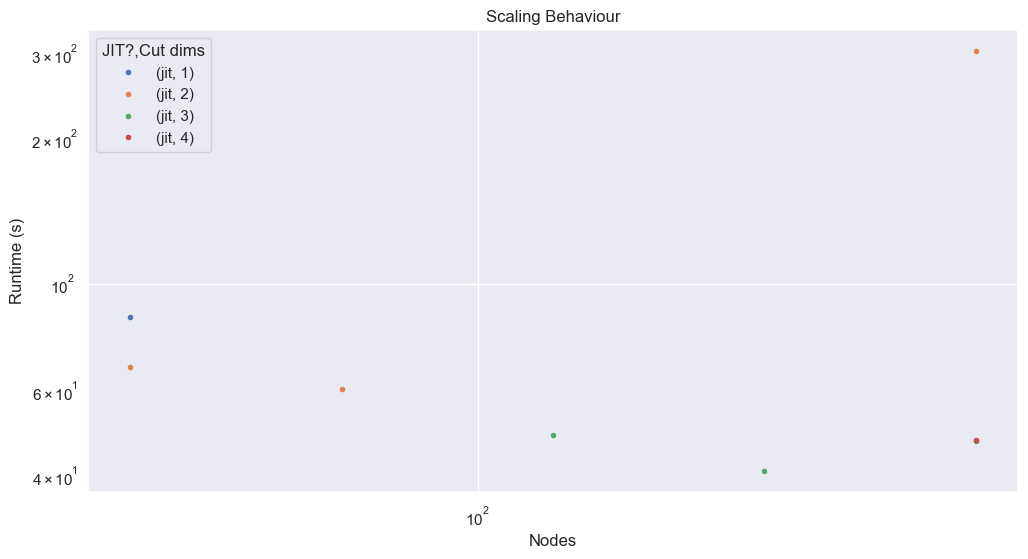

In [4]:
 df_hmc.pivot_table(index=["Nodes"], columns=[ "JIT?","Cut dims"], values="runtime (s)").plot(style=".", loglog
=True, title="Scaling Behaviour", ylabel="Runtime (s)");

In [5]:
df_spec = pd.read_csv("../../data/juwels/spec_result-x128t256.csv").sort_values(["Nodes","Tk_x","Tk_y","Tk_z","Tk_t"])
df_spec

,ID,Lt,Lx,JIT?,Nodes,Tsk,Cut dims,Tk_t,Tk_z,Tk_y,Tk_x,GFLOPS (s),min,max,runtime(s),Max rel. diff,P/F
1,1,256,128,no-jit,64,256,2,64,4,1,1,152405.5,10559.2,165619.9,690,2.200000e-06,PASS
0,0,256,128,no-jit,64,256,2,32,8,1,1,149132.7,8262.8,165390.2,558,4.700000e-08,PASS
2,2,256,128,no-jit,128,512,3,64,4,2,1,248689.6,23136.3,295877.7,412,2.200000e-06,PASS
4,4,256,128,no-jit,256,1024,2,64,16,1,1,374251.4,39551.8,507861.5,263,1.500000e-06,PASS
3,3,256,128,no-jit,256,1024,3,32,8,4,1,311275.5,32565.2,433388.2,441,2.500000e-08,PASS
5,5,256,128,no-jit,256,1024,4,16,4,4,4,303573.0,32252.8,533076.0,220,1.100000e-06,PASS


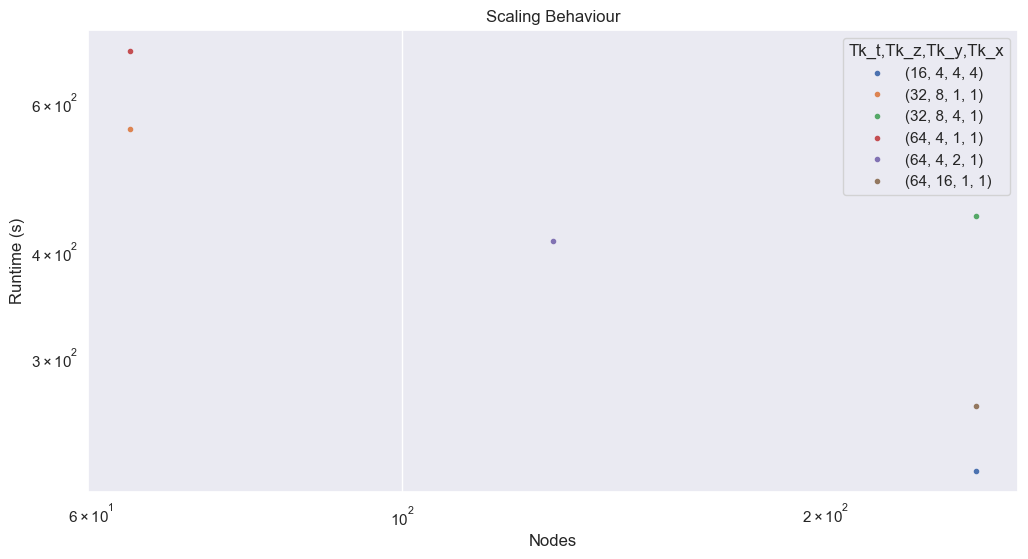

In [6]:
df_spec.pivot_table(index=["Nodes"], columns=[ "Tk_t","Tk_z", "Tk_y", "Tk_x"], values="runtime(s)").plot(style=".", loglog
=True, title="Scaling Behaviour", ylabel="Runtime (s)");